In [60]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [61]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [62]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [63]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [64]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.metadata.create_all(engine)

In [65]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [66]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [67]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [68]:
# Find the most recent date in the data set.

hawaii_measurements = pd.read_csv("..\\Starter Code for SQLAlchemy Challenge\\Resources\\hawaii_measurements.csv")
most_recent_date = hawaii_measurements["date"].max()
most_recent_date

'2017-08-23'

2016-08-23


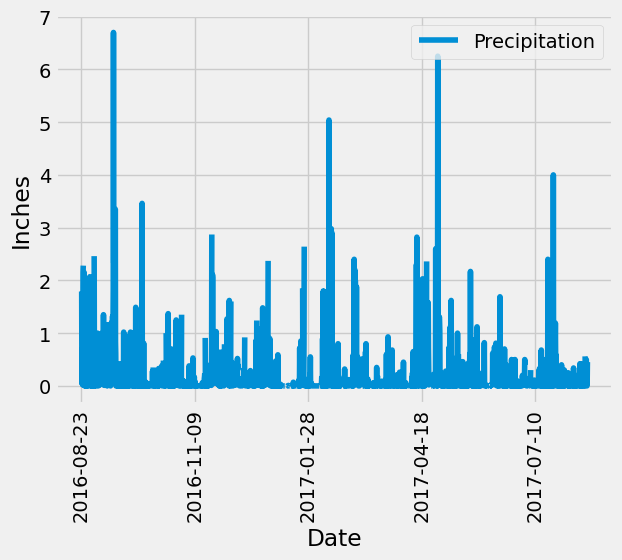

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
one_year_ago = one_year_ago.strftime('%Y-%m-%d')
print(one_year_ago)

# Perform a query to retrieve the date and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago)

precipitation_df = pd.DataFrame(precipitation, columns = ("Date", "Precipitation"))
precipitation_df



# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="Date")
precipitation_df
precipitation_ticks = precipitation_df["Date"].tolist()

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(x="Date", y="Precipitation", rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks()
plt.legend(["Precipitation"], loc = 'upper right')
plt.show()


In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number of stations in the dataset


In [72]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [75]:
# Close Session
session.close()